<a href="https://colab.research.google.com/github/Rk-Pudasaini/Monte_Carlo_Simulation/blob/main/Generating_Pseudo_Random_Numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Different Methods of Generating Random Numbers

# Algorithm to generate Pseudo Random Numbers - Congruential method
1. Start
2. Set count 0
3. Define seed ( A large number)
4. start loop (while or any other you like)
5. Calculate ran using ran = (seed* 16807)/(2**31-1)
6. Set seed equal to ran for the next iteration of the loop
7. Print random number you generated
8. Increase count by 1
9. End program

# Function to Generate Random Numbers

In [1]:
# Functions to generate random numbers using the above method
def generate_random_numbers (seed, number_of_items):
  count = 0
  random_numbers = []   #list to store random numbers

  while count < number_of_items:  #loop
    ran = (16807 * seed) % (2**31 - 1)  # generate random numbers using formula
    seed = ran
    x = ran / (2**31 - 1)  #normalize
    random_numbers.append(x)
    count += 1

  return random_numbers

In [4]:
random_number_list = generate_random_numbers(157392, 10)
random_number_list

[0.23180791047951574,
 0.9955514292211977,
 0.232870920669693,
 0.861563695530204,
 0.3010307761379661,
 0.4242545507961207,
 0.4462352304003365,
 0.8755173384563613,
 0.81990743606347,
 0.1842779187412364]

## Create One random number and write it into the file

In [5]:
def write_random_numbers(file_name, seed, number_of_items):
  #generate random number using function
  random_numbers = generate_random_numbers(seed, number_of_items)
  #for file operations
  with open(file_name, 'w') as f:
    for ran in random_numbers:
      f.write(f'{ran}\n')


#call the function to create a random number and write it into a file
write_random_numbers('/content/random_one.dat', seed = 24903482, number_of_items = 100)

## Create two random numbers

In [6]:
# function to generate two random number and write it in file
def generate_two_random_numbers(file_name, seed, number_of_items):
    count  = 0
    seed = seed
    with open(file_name, 'w') as f:
        while (count < number_of_items):
            ran1 = (16807 * seed) % (2**31 - 1)
            seed = ran1
            x = ran1 / (2**31 - 1)
            ran2 = (16807 * seed) % (2**31 - 1)
            seed = ran2
            y = ran2 / (2**31 - 1)
            f.write(f'{str(x)}, {str(y)}\n')
            count += 1

#call the function to create a random number and write it into a file
generate_two_random_numbers('/content/random_two.dat', seed = 24903482, number_of_items = 100)

# Example Questions
Now create two random number x and y of size 1000, 10000, 250000, 500000 save it in the different text file as random1.dat, random2.dat, random3.dat and random4.dat and plot those points. Find the uniformatiy of the distributions

In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
#define the function to create different files and write the mentioned random numbers generated on it
def create_dat_file(file_name, seed, number_of_items):
    count  = 0
    seed = seed
    with open(file_name, 'w') as f:
        while (count < number_of_items):
            ran1 = (16807 * seed) % (2**31 - 1)
            seed = ran1
            x = ran1 / (2**31 - 1)
            ran2 = (16807 * seed) % (2**31 - 1)
            seed = ran2
            y = ran2 / (2**31 - 1)
            f.write(f'{str(x)}, {str(y)}\n')
            count += 1

In [12]:
# Create data files
create_dat_file('/content/random1.dat', seed=123, number_of_items=1000)
create_dat_file('/content/random2.dat', seed=456, number_of_items=10000)
create_dat_file('/content/random3.dat', seed=789, number_of_items=25000)
create_dat_file('/content/random4.dat', seed=321, number_of_items=50000)


In [13]:
#function to plot the scatter plots
def plot_scatter(file_name):
    data = np.loadtxt(file_name, delimiter=',')
    x = data[:, 0]
    y = data[:, 1]

    plt.scatter(x, y, s=5)
    plt.title(f'Scatter Plot of {file_name}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()


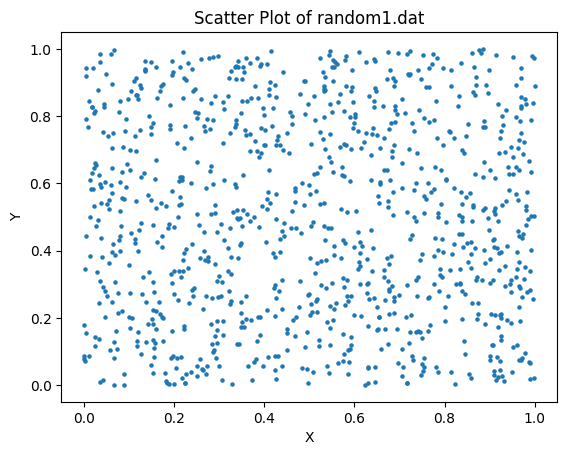

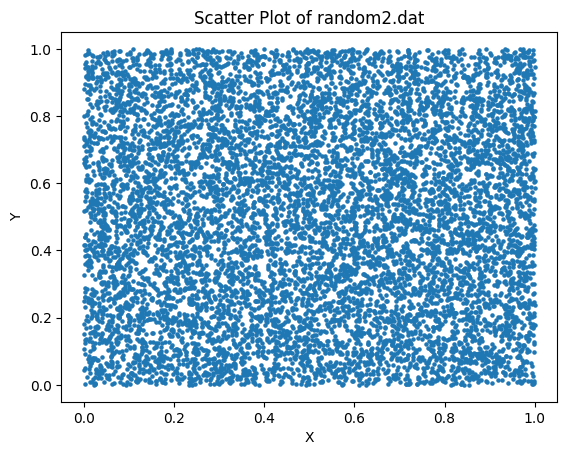

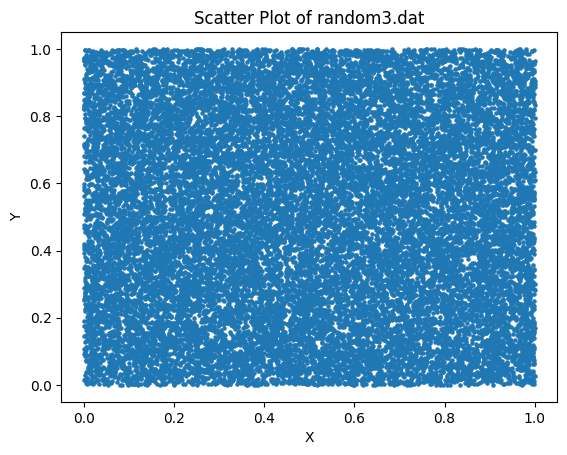

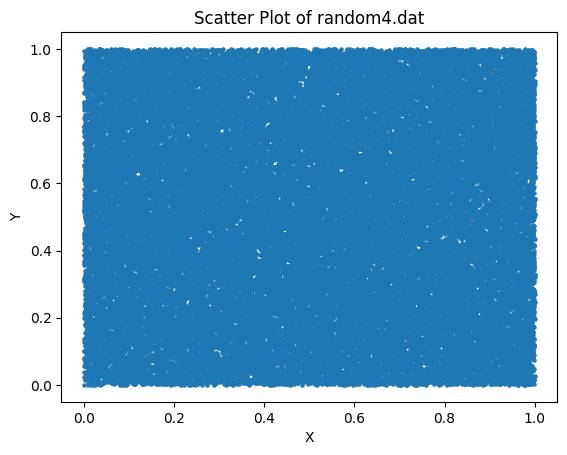

In [14]:
# Plot scatter plots
plot_scatter('random1.dat')
plot_scatter('random2.dat')
plot_scatter('random3.dat')
plot_scatter('random4.dat')

## Show them using the sub plot

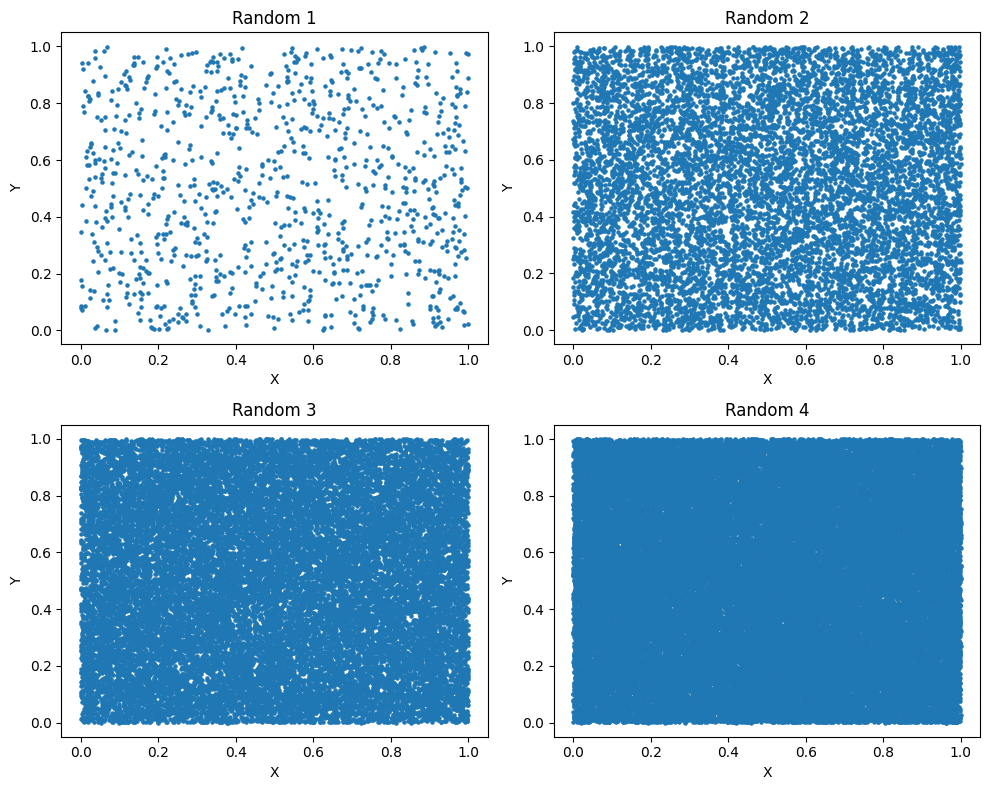

In [15]:
#for multiple plots
def subplot_scatter(ax, file_name, title):
    data = np.loadtxt(file_name, delimiter=',')
    x = data[:, 0]
    y = data[:, 1]

    ax.scatter(x, y, s=5)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

# Plot all scatter plots in one subplot
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

subplot_scatter(axs[0, 0], '/content/random1.dat', 'Random 1')
subplot_scatter(axs[0, 1], '/content/random2.dat', 'Random 2')
subplot_scatter(axs[1, 0], '/content/random3.dat', 'Random 3')
subplot_scatter(axs[1, 1], '/content/random4.dat', 'Random 4')

plt.tight_layout()
plt.show()

## Check Distribution

In [16]:
#Check the distribution of random numbers in different files
file_names = ['random1.dat', 'random2.dat', 'random3.dat', 'random4.dat']

def check_distribution(file_names):

    for file_name in file_names:
        data = np.loadtxt(file_name, delimiter=',')
        ran1 = data[:, 0]
        ran2 = data[:, 1]

        mean_ran1 = np.mean(ran1)
        std_ran1 = np.std(ran1)
        mean_ran2 = np.mean(ran2)
        std_ran2 = np.std(ran2)

        print(f'File: {file_name}')
        print(f'Mean of ran1: {mean_ran1}, Standard Deviation of ran1: {std_ran1}')
        print(f'Mean of ran2: {mean_ran2}, Standard Deviation of ran2: {std_ran2}')

check_distribution(file_names)


File: random1.dat
Mean of ran1: 0.5064158486590795, Standard Deviation of ran1: 0.2954841538920199
Mean of ran2: 0.49416841314834004, Standard Deviation of ran2: 0.2922047862212456
File: random2.dat
Mean of ran1: 0.5062868678225144, Standard Deviation of ran1: 0.289918861228606
Mean of ran2: 0.49688749299817137, Standard Deviation of ran2: 0.2867328804417013
File: random3.dat
Mean of ran1: 0.4979123684036324, Standard Deviation of ran1: 0.28733873160018564
Mean of ran2: 0.4997357598491645, Standard Deviation of ran2: 0.289105147353275
File: random4.dat
Mean of ran1: 0.49949318270155846, Standard Deviation of ran1: 0.28920059981650315
Mean of ran2: 0.500141665092456, Standard Deviation of ran2: 0.2883367021149223


From this we could conclude that the random numbers are uniformly distributed with
little bit difference in the mean and standard deviations in existing random numbers of
different files.

Further to check we create the histogram for each random variables in different files
using the function below:

## Plot histogram

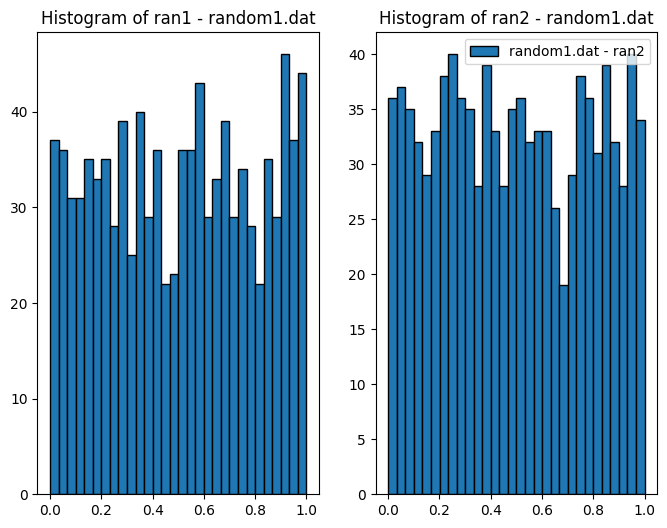

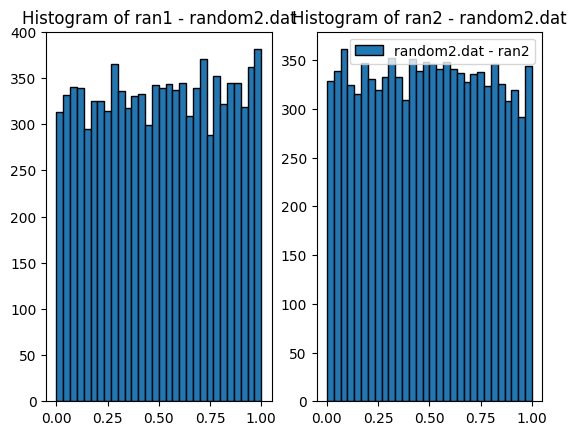

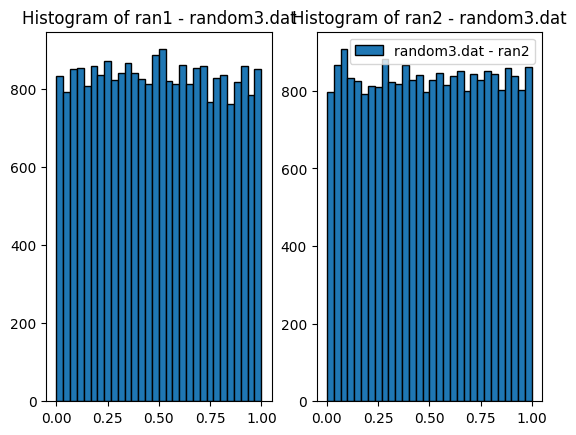

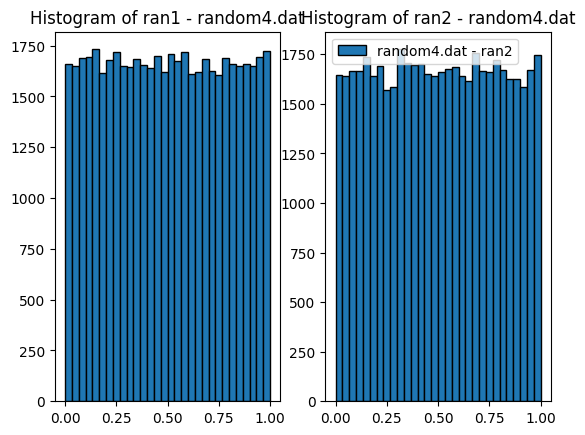

In [18]:
def plot_multiple(file_names):
    plt.figure(figsize=(8, 6))

    for file_name in file_names:
        data = np.loadtxt(file_name, delimiter=',')
        ran1 = data[:, 0]
        ran2 = data[:, 1]

        plt.subplot(1, 2, 1)
        plt.hist(ran1, bins=30, edgecolor='black', label=f'{file_name} - ran1')
        plt.title(f'Histogram of ran1 - {file_name}')

        plt.subplot(1, 2, 2)
        plt.hist(ran2, bins=30, edgecolor='black', label=f'{file_name} - ran2')
        plt.title(f'Histogram of ran2 - {file_name}')

        plt.legend()  # Add legend for each file

        plt.show()  # Show histograms for each file separately


file_names = ['random1.dat', 'random2.dat', 'random3.dat', 'random4.dat']

# Call the function to plot histograms for each file
plot_multiple(file_names)

## Convert to gaussian distribution

HW: Now you try to understand at least one more PRNGs
algorithm
- Can you convert uniform distribution to gaussian distribution?
- For this: pick any two random numbers x1 and x2 from uniform
distribution
- y1 = (−2 ln(x1))1/2 cos(2πx2)
- y2 = (−2 ln(x1))1/2 sin(2πx2

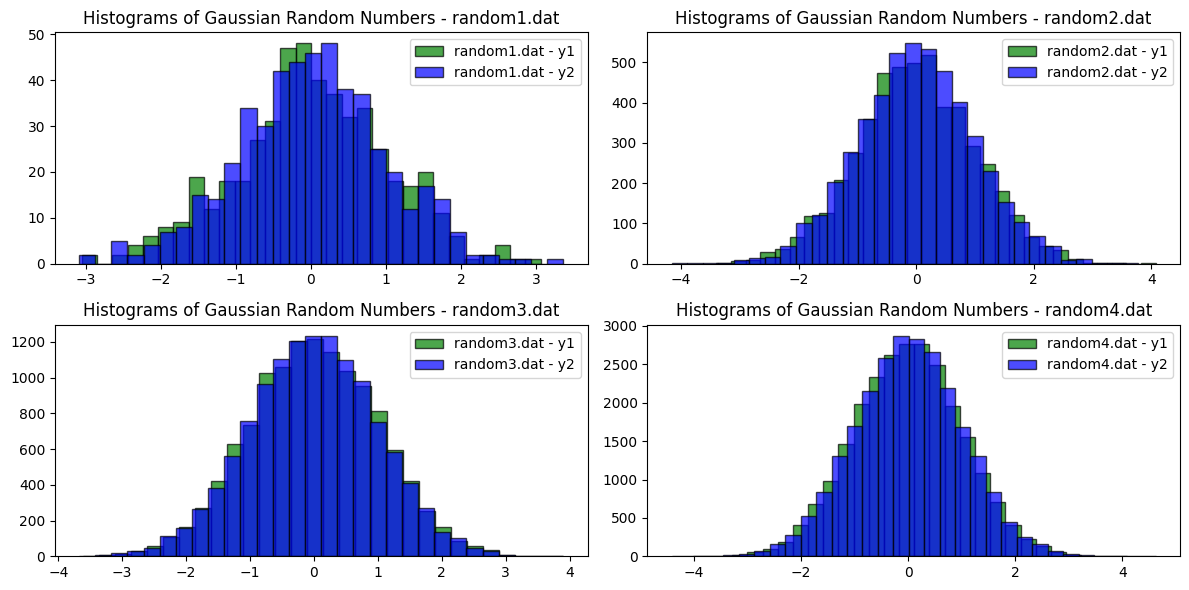

In [19]:
# Function to convert uniform distribution to Gaussian distribution using Box-Muller transform
def convert_to_gaussian_uniform(data):
    gaussian_numbers = []

    for i in range(0, len(data), 2):
        x1, x2 = data[i, 0], data[i, 1]

        y1 = (-2 * np.log(x1))**0.5 * np.cos(2 * np.pi * x2)
        y2 = (-2 * np.log(x1))**0.5 * np.sin(2 * np.pi * x2)

        gaussian_numbers.extend([y1, y2])

    return np.array(gaussian_numbers).reshape(-1, 2)

# Load data from previously used DAT files
file_names = ['random1.dat', 'random2.dat', 'random3.dat', 'random4.dat']
data = [np.loadtxt(file_name, delimiter=',') for file_name in file_names]

# Convert uniform distribution to Gaussian distribution using Box-Muller transform
gaussian_data = [convert_to_gaussian_uniform(d) for d in data]

# Plot histograms for the Gaussian random numbers
plt.figure(figsize=(12, 6))

for i, (file_name, gaussian_numbers) in enumerate(zip(file_names, gaussian_data), start=1):
    plt.subplot(2, 2, i)
    plt.hist(gaussian_numbers[:, 0], bins=30, edgecolor='black', color='green', alpha=0.7, label=f'{file_name} - y1')
    plt.hist(gaussian_numbers[:, 1], bins=30, edgecolor='black', color='blue', alpha=0.7, label=f'{file_name} - y2')
    plt.title(f'Histograms of Gaussian Random Numbers - {file_name}')
    plt.legend()

plt.tight_layout()
plt.show()


From this we can conclude that the resultant uniform distribution is transformed to
Normal distribution and we can visualize the distribution of the data in Normal form with
the help of the histogram. There is some fluctuation in the distribution of variables in
different files.


Auto Corelation